<a href="https://colab.research.google.com/github/Mohitkhatri1902/Health-Insurance-Cross-Sell-Vehicle-Insurance/blob/main/Mohit_Khatri_ML_Submission_Project_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health-insurance-cross-sell-prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member  -** - Mohit Khatri


# **Project Summary -**

Our project revolves around assisting an insurance company in enhancing its business model by predicting customer interest in Vehicle Insurance. The company, which already provides Health Insurance to its customers, seeks to diversify its offerings and tap into the market for Vehicle Insurance. By leveraging predictive modeling techniques, we aim to identify potential customers from the previous year who are likely to show interest in purchasing Vehicle Insurance.

The significance of this project lies in its potential to optimize the company's revenue generation and communication strategies. By accurately predicting customer interest in Vehicle Insurance, the company can tailor its marketing efforts and outreach campaigns, thereby maximizing the effectiveness of its resources. Additionally, by expanding its portfolio to include Vehicle Insurance, the company can capitalize on additional revenue streams and strengthen its competitive position in the insurance market.

To achieve our goal, we will employ various data science methodologies and techniques. We will start by acquiring and preprocessing the necessary data, which includes demographic information (such as gender, age, and region code type), vehicle details (including vehicle age and damage), and policy-related data (such as premium amount and sourcing channel). Through careful data cleaning and feature engineering, we will ensure that the dataset is suitable for model training and evaluation.

Next, we will explore and analyze the dataset to gain insights into the underlying patterns and relationships between different variables. This exploratory data analysis (EDA) phase will help us understand the characteristics of the data and identify potential predictors of customer interest in Vehicle Insurance.

Following the EDA phase, we will proceed to model development and evaluation. We will experiment with various machine learning algorithms, such as logistic regression, decision trees, random forests, and gradient boosting, to build predictive models. These models will be trained on historical data containing information about past customers and their purchasing behavior. We will evaluate the performance of each model using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC AUC.

Once we have identified the best-performing model, we will fine-tune its hyperparameters using techniques like grid search or random search to optimize its predictive performance further. The final model will then be deployed into production, where it will be used to predict customer interest in Vehicle Insurance for the upcoming year.

In conclusion, our project aims to leverage data science and predictive modeling techniques to help the insurance company identify potential customers interested in Vehicle Insurance. By accurately predicting customer behavior, the company can enhance its business strategies, improve customer satisfaction, and drive revenue growth in the competitive insurance market.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Our client, an insurance company, seeks assistance in developing a model to forecast whether policyholders from the previous year would exhibit interest in the Vehicle Insurance offered by the company. As an insurance policy entails a guarantee of compensation for specified loss, damage, illness, or death in exchange for a premium payment, the client aims to extend its services to customers who might consider purchasing Vehicle Insurance.

The objective is to predict customer interest in Vehicle Insurance to enable targeted communication strategies, optimizing the company's business model and revenue generation. Leveraging demographic data (gender, age, region code type), vehicle information (vehicle age, damage), and policy details (premium, sourcing channel), the model aims to identify potential customers receptive to Vehicle Insurance offerings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading dataset
ins_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
ins_df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
ins_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = ins_df.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


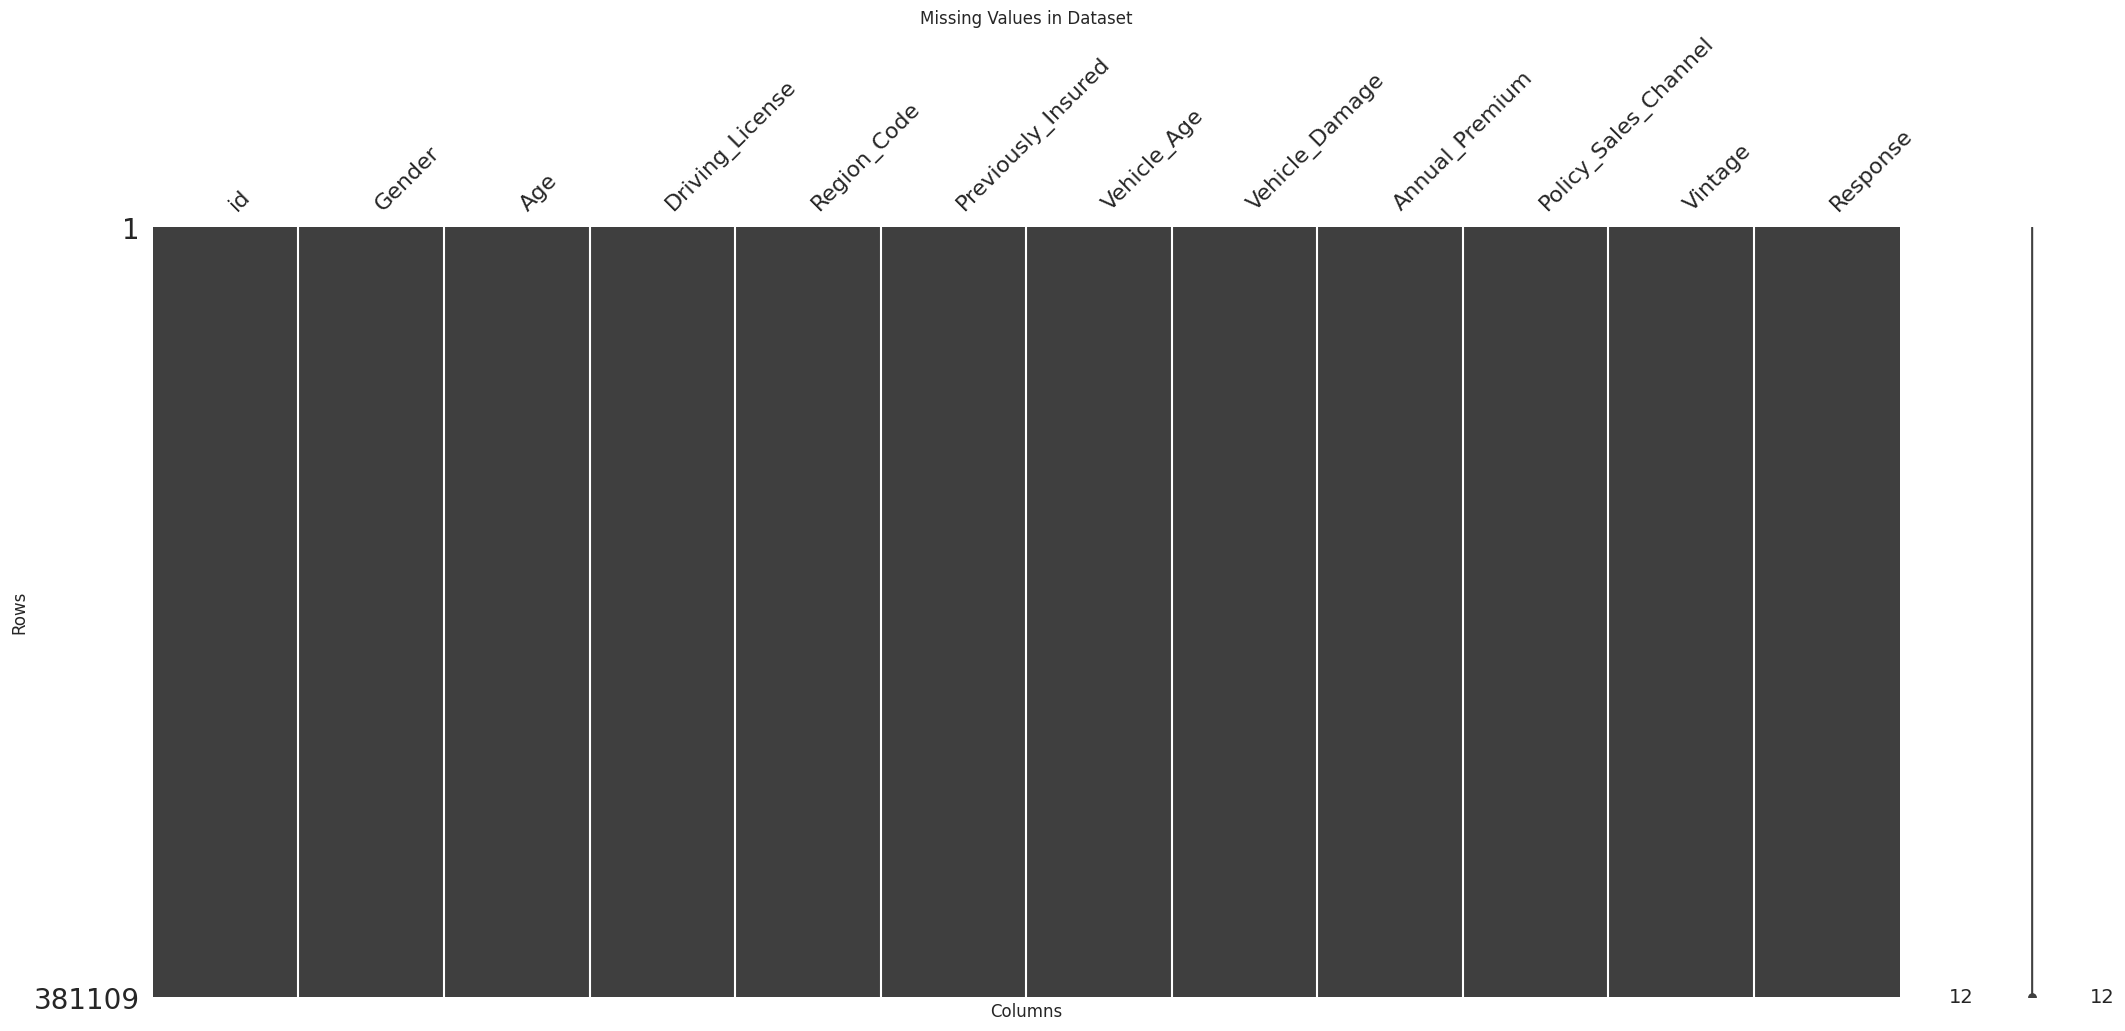

In [ ]:
# Visualizing the missing values
import missingno as msno

msno.matrix(ins_df)

# Add title and labels
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

### What did you know about your dataset?

In this dataset we have 381109 rows and 12 columns, we dont have any duplicate values and missing values in this dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ins_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Columns:

> **ID:** Unique identifier for the Customer.

>**Age:** Age of the Customer.

>**Gender:** Gender of the Customer.

>**Driving_License:** 0 for customer not having DL, 1 for customer having DL.

>**Region_Code:** Unique code for the region of the customer.

>**Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

>**Vehicle_Age:** Age of the vehicle.

>**Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

>**Annual_Premium:** The amount customer needs to pay as premium in the year.

>**Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

>**Vintage**: Number of Days, Customer has been associated with the company.

>**Response (Dependent Feature):** 1 for Customer is interested, 0 for Customer is not interested.

Let's deep dive into the dataset,

In [ ]:
# Dataset Describe
ins_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

Here's a description of the variables in the dataset:

- **id**: Unique identifier for each record.
- **Age**: Age of the customer.
- **Driving_License**: Binary variable indicating whether the customer has a driving license (1 = Yes, 0 = No).
- **Region_Code**: Code representing the region where the customer resides.
- **Previously_Insured**: Binary variable indicating whether the customer was previously insured (1 = Yes, 0 = No).
- **Annual_Premium**: Annual premium amount paid by the customer for insurance.
- **Policy_Sales_Channel**: Code representing the channel through which the policy was sold.
- **Vintage**: Number of days since the customer was associated with the company.
- **Response**: Binary variable indicating whether the customer responded positively to the vehicle insurance offer (1 = Yes, 0 = No).

The table also provides descriptive statistics for each variable, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in ins_df.columns:
  print(f"Unique values for {col}: {ins_df[col].unique()}")

Unique values for id: [     1      2      3 ... 381107 381108 381109]
Unique values for Gender: ['Male' 'Female']
Unique values for Age: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Unique values for Driving_License: [1 0]
Unique values for Region_Code: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Unique values for Previously_Insured: [0 1]
Unique values for Vehicle_Age: ['> 2 Years' '1-2 Year' '< 1 Year']
Unique values for Vehicle_Damage: ['Yes' 'No']
Unique values for Annual_Premium: [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Unique values for Policy_Sales_Channel: [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Response', ylabel='count'>

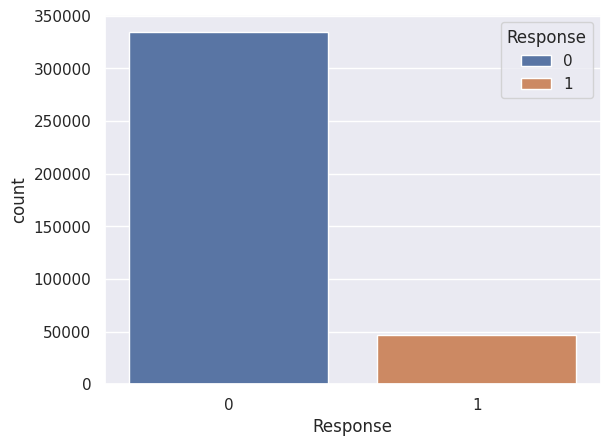

In [ ]:
# Chart - 1 visualization code
sns.set_theme(style="darkgrid")
sns.countplot(x='Response', hue='Response', data=ins_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The data is highly imbalanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

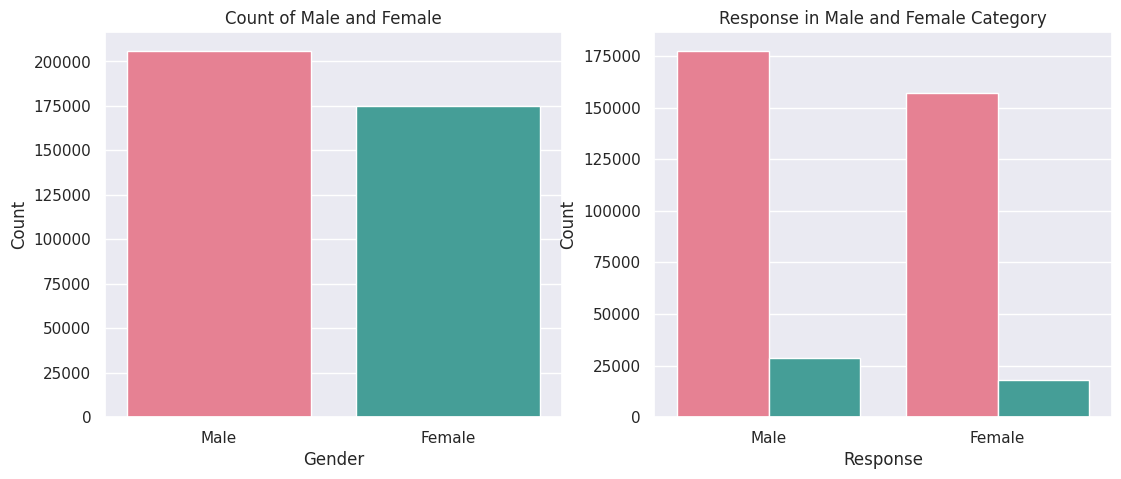

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
sns.countplot(x='Gender', hue='Gender', data=ins_df, palette='husl', legend=False)
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Response', data=ins_df, palette='husl', legend=False)
plt.title("Response in Male and Female Category")
plt.xlabel('Response')
plt.ylabel('Count')

plt.show()

##### 2. What is/are the insight(s) found from the chart?

*   The gender variable in the dataset is almost equally distributed.
*   Male category is slightly greater than that of female and chances of buying the insurance is also little high.

#### Chart - 3 - Age Vs Response

<Axes: xlabel='Age', ylabel='count'>

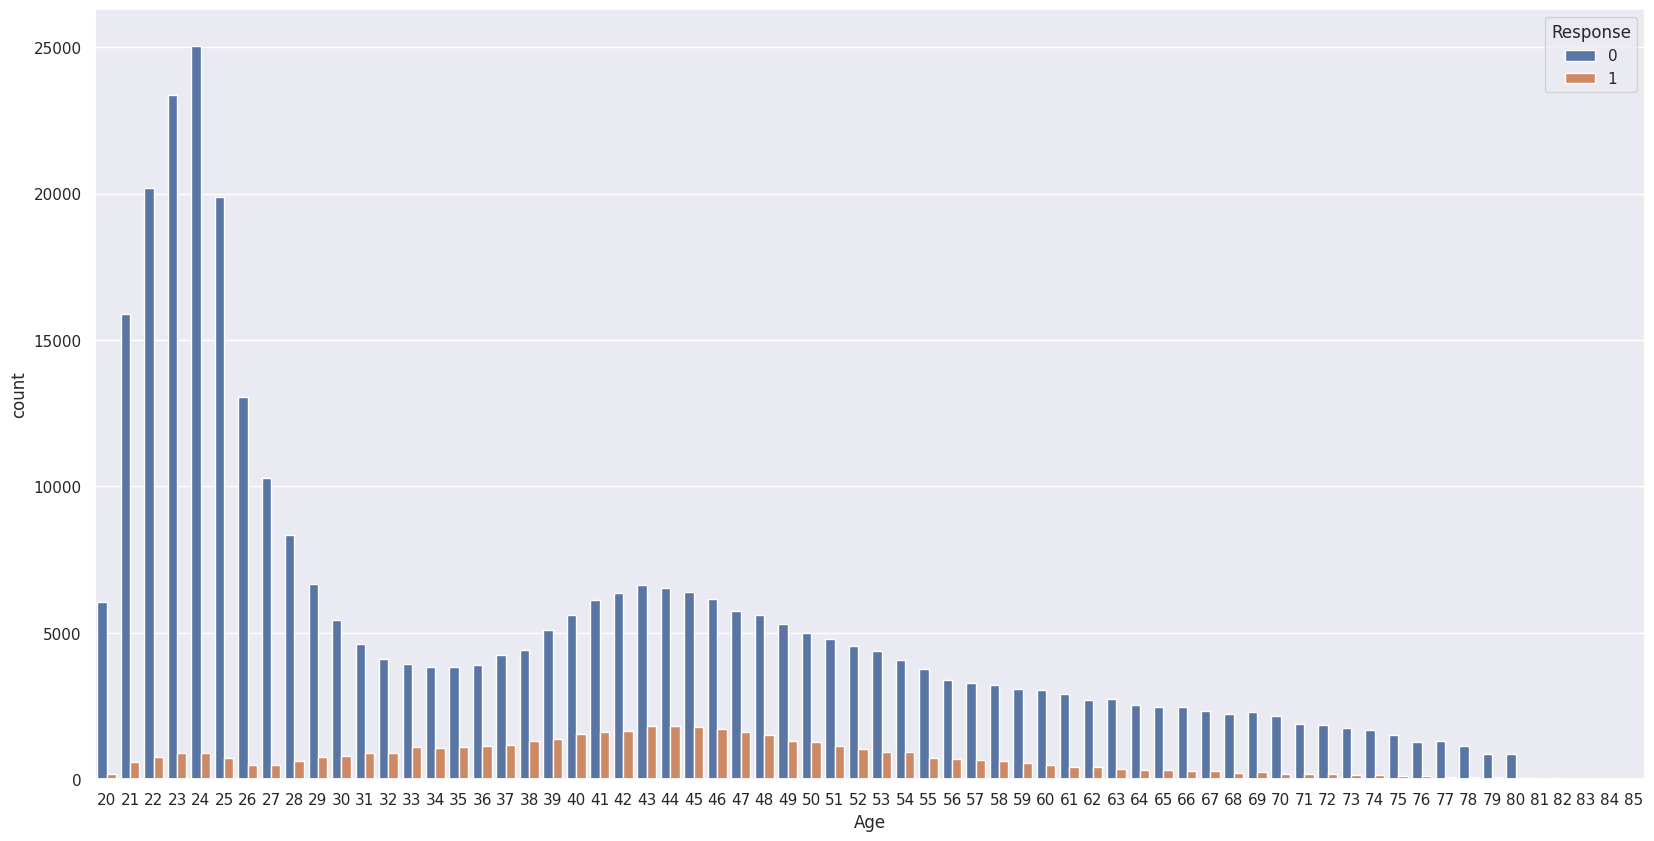

In [ ]:
# Chart - 3 visualization code

#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=ins_df)

<Axes: ylabel='Age'>

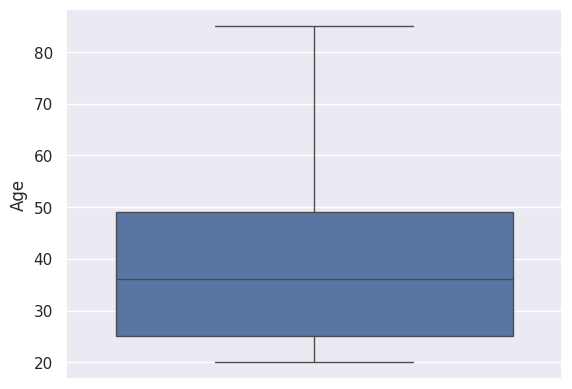

In [ ]:
sns.boxplot(ins_df['Age'])

##### 2. What is/are the insight(s) found from the chart?



*   Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
*   People aged between 30-60 are more likely to be interested.


*   From the boxplot we can see that there no outlier in the data.






#### Chart - 4

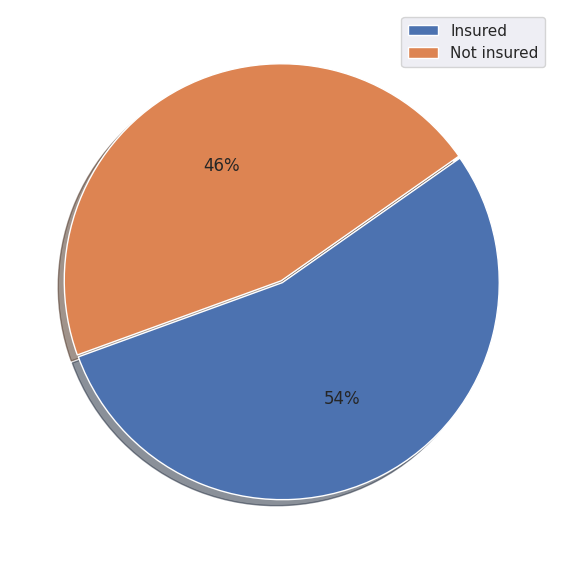

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(7,9))
plt.pie(ins_df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   54% customer are previously insured and 46% customer are are not insured yet.
*   Customer who are not perviosly insured are likely to be inetrested.



#### Chart - 5

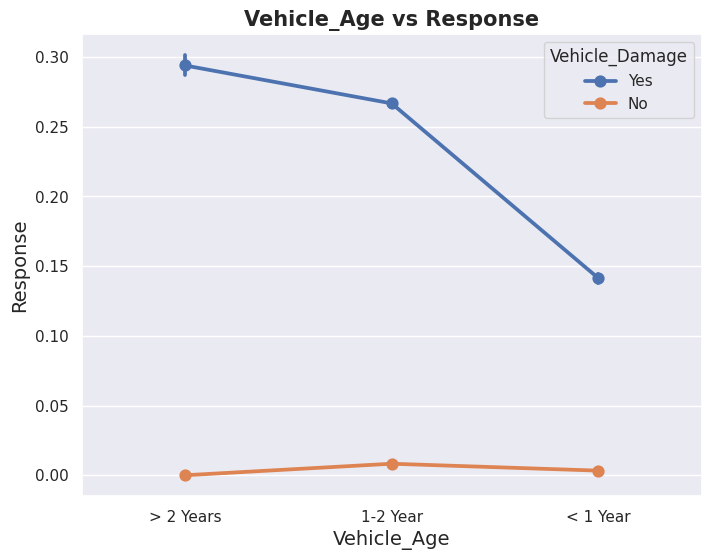

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(8, 6))
sns.pointplot(y='Response', x='Vehicle_Age', hue='Vehicle_Damage', data=ins_df)
plt.xlabel('Vehicle_Age', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.title('Vehicle_Age vs Response', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

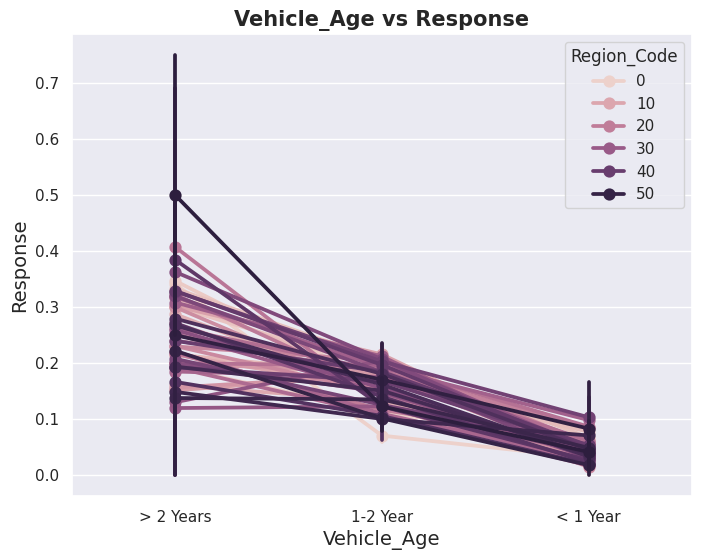

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(8, 6))
sns.pointplot(y='Response', x='Vehicle_Age', hue='Region_Code', data=ins_df)
plt.xlabel('Vehicle_Age', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.title('Vehicle_Age vs Response', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Driving License

In [ ]:
ins_df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [ ]:
ins_df.groupby(['Driving_License', 'Response']).size().unstack()

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


<Axes: xlabel='Driving_License'>

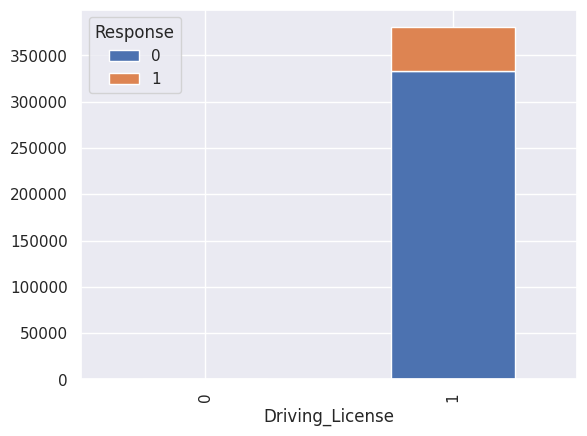

In [ ]:
# Chart - 7 visualization code
ins_df.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Vehicle Damage

In [ ]:
ins_df.groupby(['Vehicle_Damage', 'Response']).size().unstack()

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


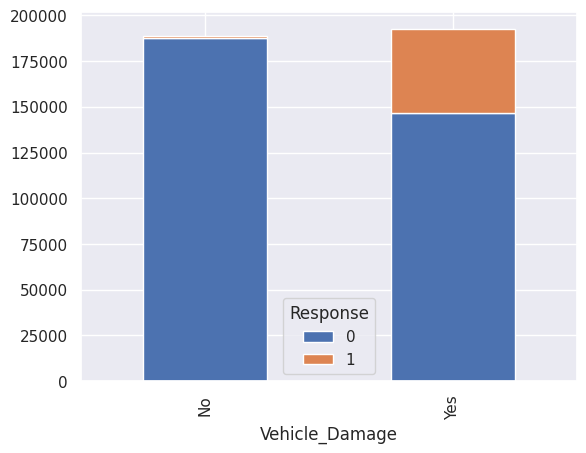

In [ ]:
# Chart - 8 visualization code
ins_df.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

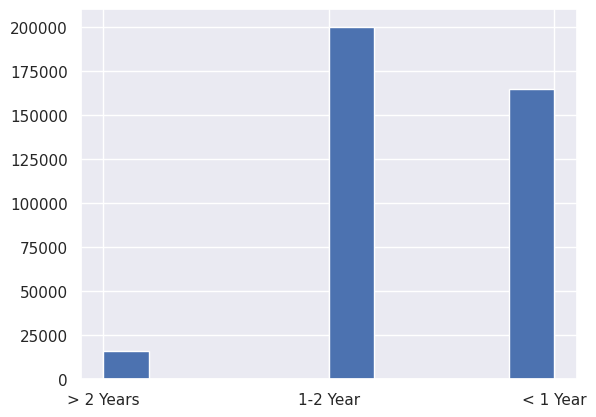

In [ ]:
ins_df['Vehicle_Age'].hist();



*   From the above plot we can see that most of the people are having vehicle age between 1 or 2 years and very few people are having vehicle age more than 2 years.



##### 2. What is/are the insight(s) found from the chart?



*   Customers whose vehicle is NOT damaged in past are almost certainly going to respond NO for vehicle insurance.
*   So, like 'Previously_Insured', 'Vehicle_Damage' in past turns out to be an excellent feature!



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Vehicle Age and Customer Response analysis

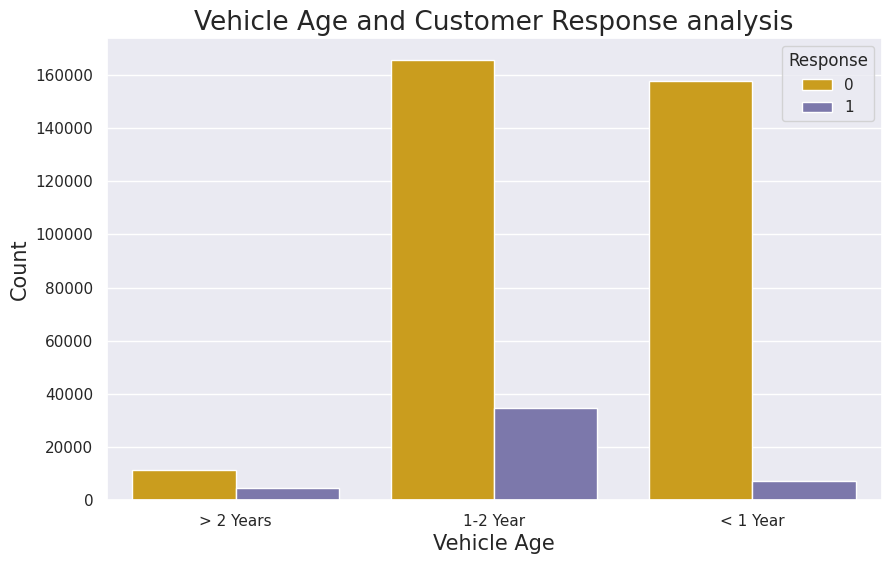

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (10,6) )
sns.countplot(data = ins_df, x = 'Vehicle_Age', hue = 'Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

<ipython-input-258-a7cd8bc19e1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Response', y='Annual_Premium', data=ins_df, palette='Set2')


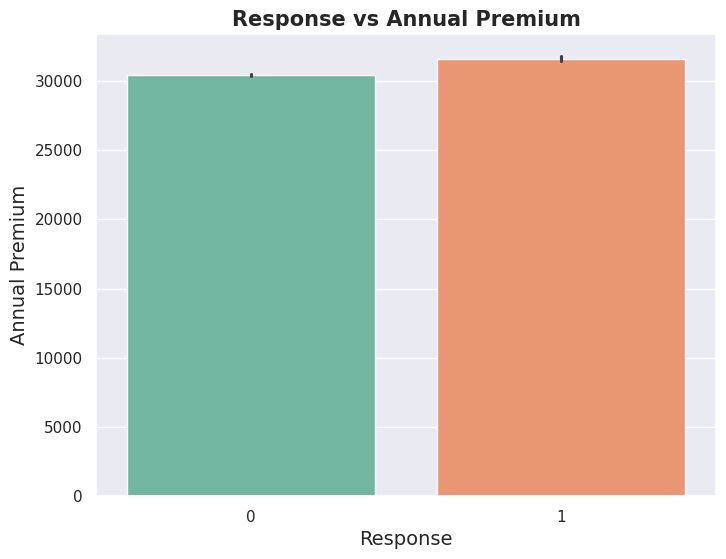

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Response', y='Annual_Premium', data=ins_df, palette='Set2')
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.title('Response vs Annual Premium', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?


*   Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
*   Customers with with Vehicle_Age <1 years have very less chance of buying Insurance



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Previously_Insured Vs Response

<Axes: xlabel='Previously_Insured', ylabel='count'>

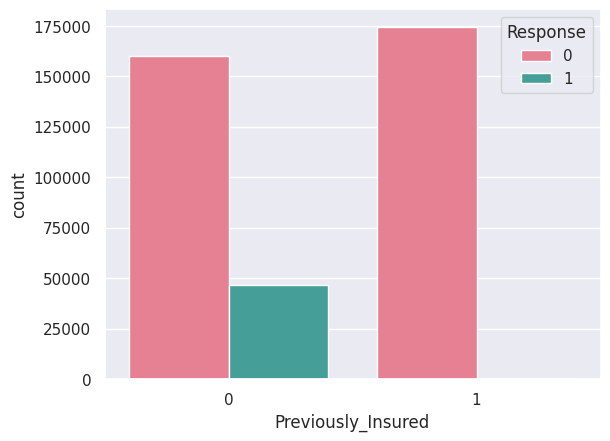

In [ ]:
# Chart - 10 visualization code

sns.countplot(x='Previously_Insured',hue='Response',data=ins_df, palette='husl')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Customer who are not perviosly insured are likely to be inetrested

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

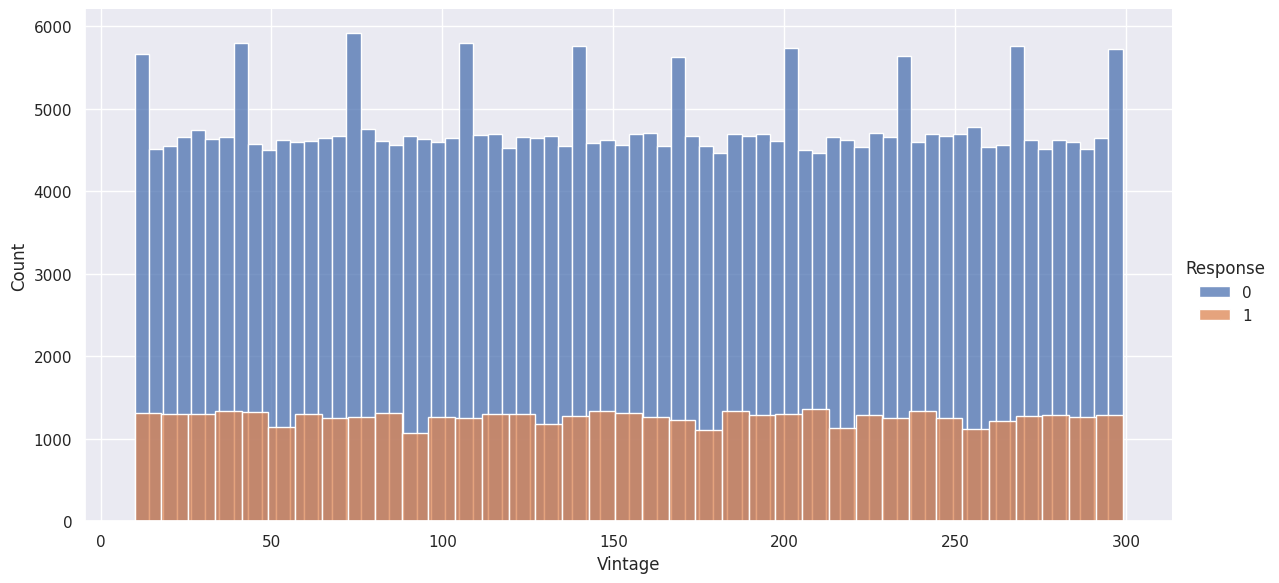

In [ ]:
# Chart - 11 visualization code

# Create a FacetGrid plot
g = sns.FacetGrid(data=ins_df, hue='Response', height=6, aspect=2)

# Plot the distribution of 'Vintage' for each category of 'Response' using histplot
g.map(sns.histplot, 'Vintage').add_legend()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

There is a very high overlap. Clearly, this feature alone is very bad for perdiction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

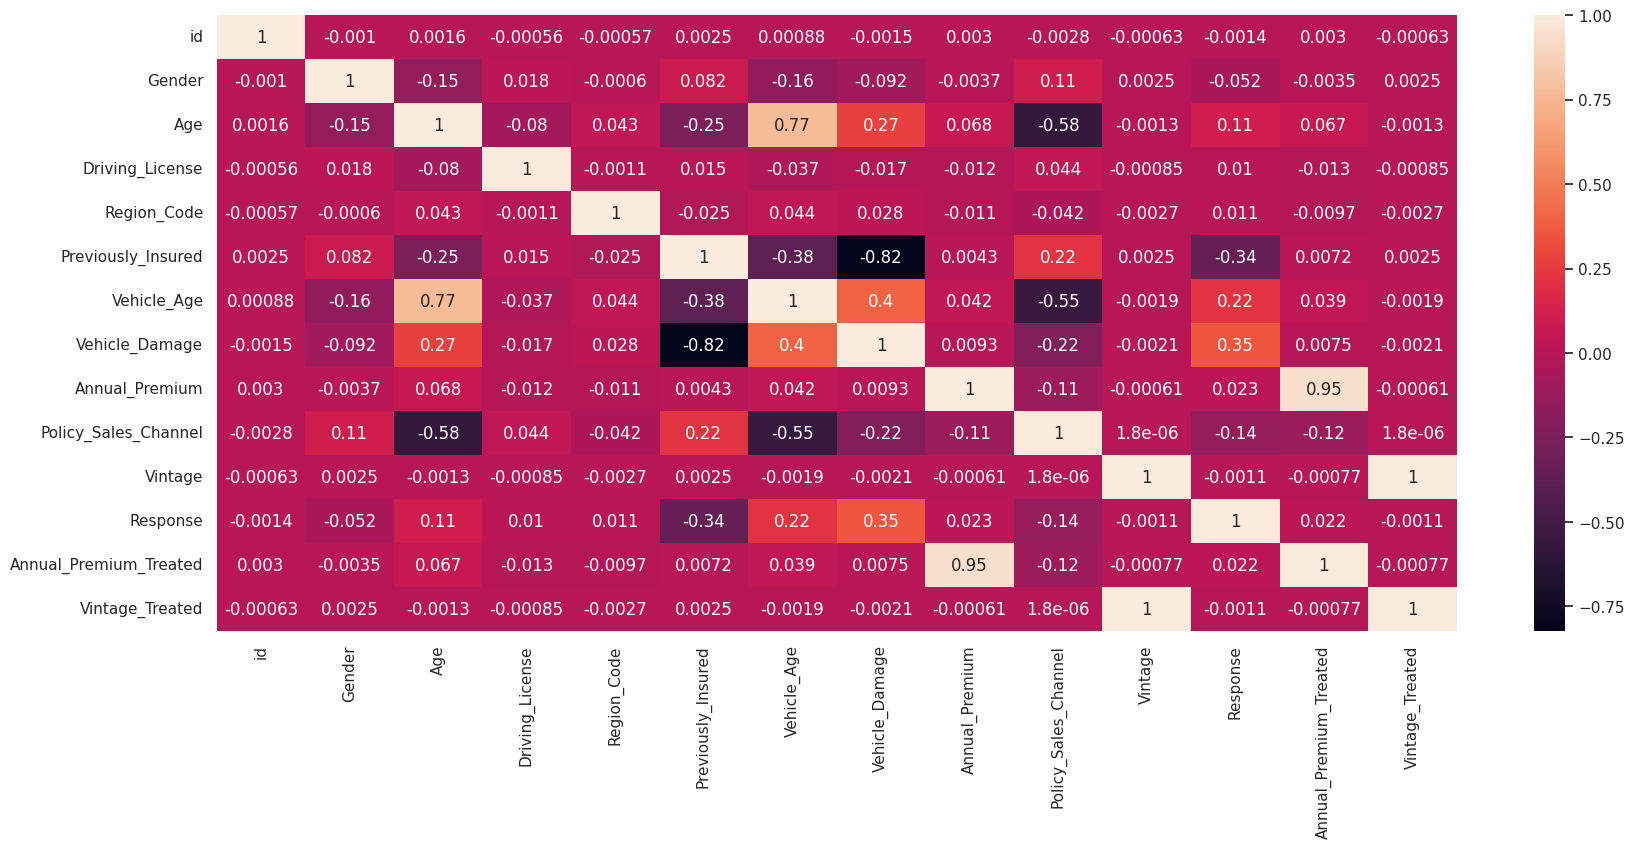

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (20, 8))
sns.heatmap(ins_df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

*   Target variable is not much affected by Vintage variable. we can drop least correlated variable.



#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_values = ins_df.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since we dont have any missing values we have not used any Technique.

### 2. Handling Outliers

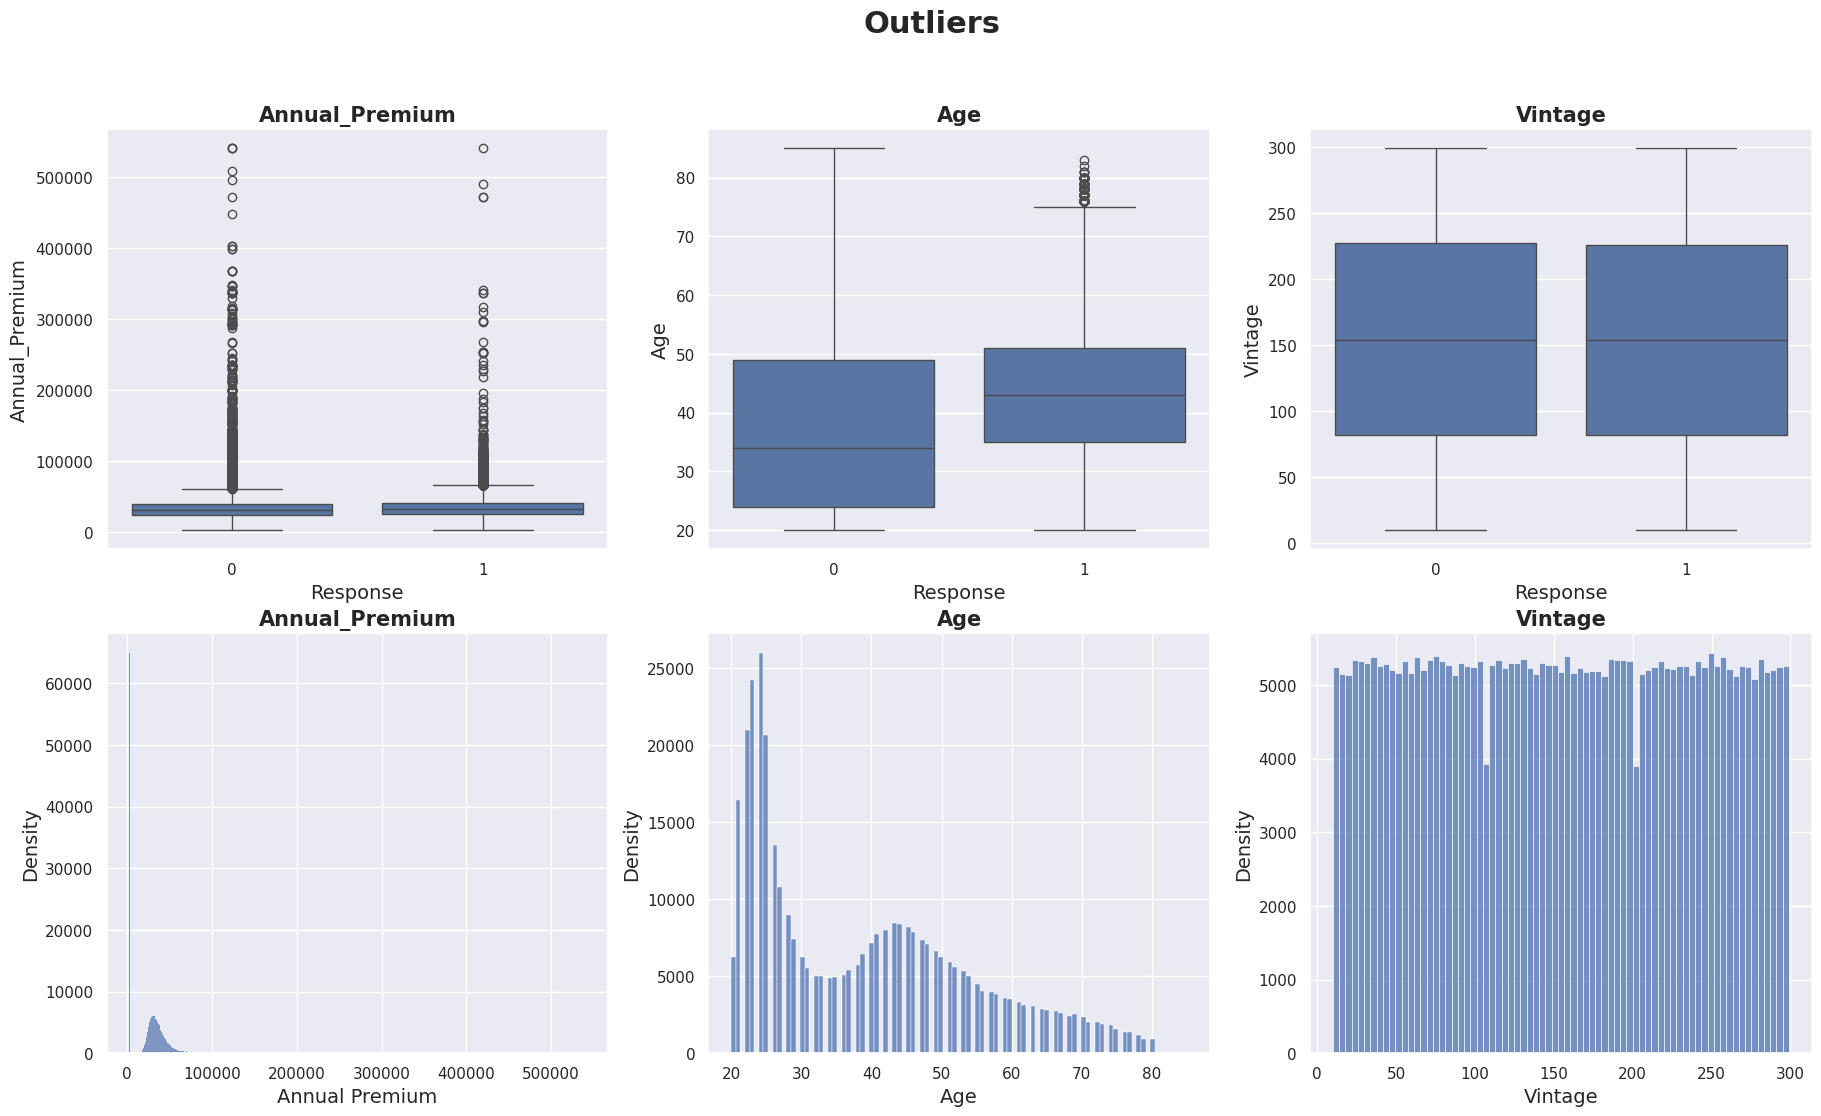

In [ ]:
# Handling Outliers & Outlier treatments
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = ins_df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = ins_df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = ins_df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.histplot(ax = axes[1][0],x = ins_df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1],x = ins_df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][2],x = ins_df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(ins_df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.
*   **Age** columns has some outliers but we are not going to treat them because it won't be affecting our result.





# Outlier Treatment and Feature Scaling



*   For Outlier treatment we will be applying quantile method.
*   For feature Scaling we will be using MinMaxScaler technique for Normlization



In [ ]:
from sklearn.preprocessing import MinMaxScaler
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(ins_df)
scale_features(ins_df)

<ipython-input-271-c16ee2a6d670>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1], x = ins_df['Annual_Premium_Treated'], color='brown')


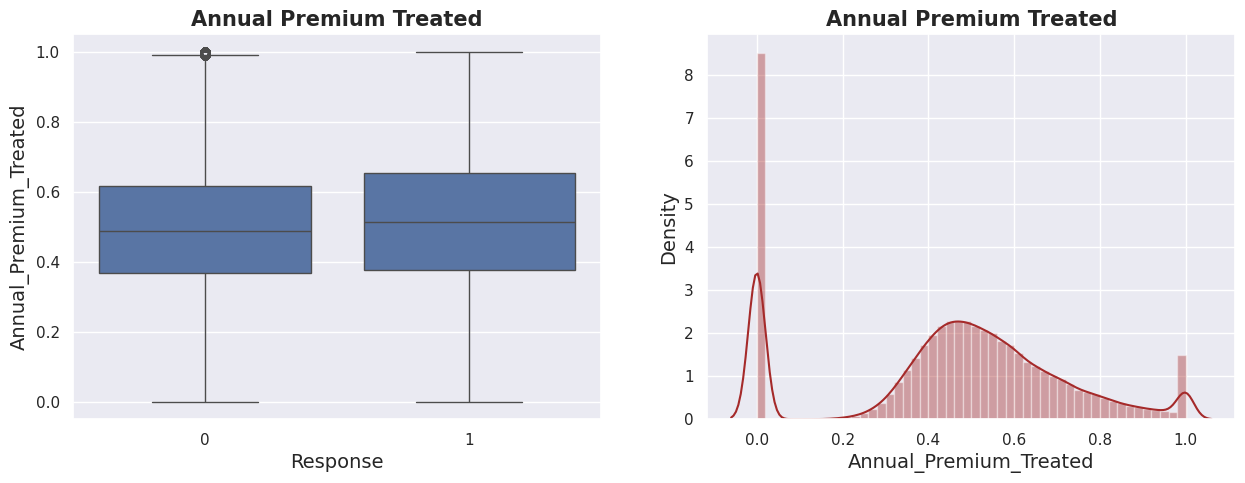

In [ ]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = ins_df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = ins_df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(ins_df)

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
ins_df['Gender'] = ins_df['Gender'].map({'Female':1, 'Male':0})
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.638245,0.716263
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.521510,0.598616
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.601797,0.058824
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438540,0.667820
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419591,0.100346


In [ ]:
ins_df['Vehicle_Age']= ins_df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,0,44,1,28.0,0,2,Yes,40454.0,26.0,217,1,0.638245,0.716263
1,2,0,76,1,3.0,0,1,No,33536.0,26.0,183,0,0.521510,0.598616
2,3,0,47,1,28.0,0,2,Yes,38294.0,26.0,27,1,0.601797,0.058824
3,4,0,21,1,11.0,1,0,No,28619.0,152.0,203,0,0.438540,0.667820
4,5,1,29,1,41.0,1,0,No,27496.0,152.0,39,0,0.419591,0.100346


In [ ]:
ins_df['Vehicle_Damage']=ins_df['Vehicle_Damage'].map({'Yes':1, 'No':0})
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.638245,0.716263
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.521510,0.598616
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.601797,0.058824
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.438540,0.667820
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,0.419591,0.100346


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
correlation = ins_df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage            0.354400
Vehicle_Age               0.221874
Age                       0.111147
Annual_Premium            0.022575
Annual_Premium_Treated    0.022054
Region_Code               0.010570
Driving_License           0.010155
Vintage_Treated          -0.001050
Vintage                  -0.001050
id                       -0.001368
Gender                   -0.052440
Policy_Sales_Channel     -0.139042
Previously_Insured       -0.341170
Name: Response, dtype: float64

#### 2. Feature Selection

<ipython-input-312-3849877a2015>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_values, y=correlation_values.index, palette='viridis')


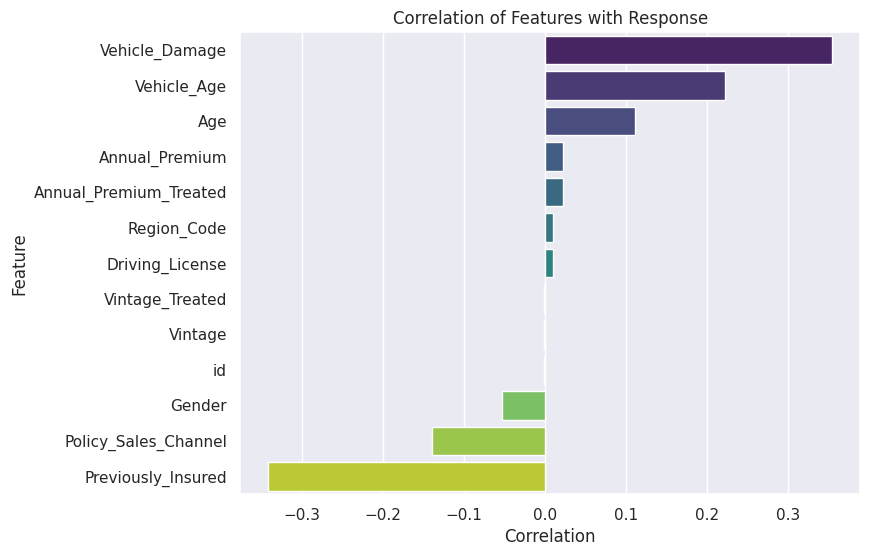

In [ ]:
# Correlation values
correlation_values = correlation['Response'].sort_values(ascending=False)[1:]

# Plot the correlation values
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_values, y=correlation_values.index, palette='viridis')
plt.title('Correlation of Features with Response')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [ ]:
X=ins_df.drop(columns=['id','Driving_License','Policy_Sales_Channel','Vintage','Response'])# independent variable
y = ins_df['Response']# dependent variable

In [ ]:
# Fill any numerical NaNs with mode()

fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
ins_df = ins_df.apply(fill_mode, axis=0)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.638245,0.716263
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.521510,0.598616
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.601797,0.058824
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.438540,0.667820
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,0.419591,0.100346


In [ ]:
# Transform Your data
# check for imbalance in data
ins_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

*   We can clearly see that there is a huge difference between the data set
*   Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. So solving this issue we use resampling technique.



### 6. Data Scaling

In [ ]:
# Scaling your data
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

# Splitting the data in train and test sets

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 9), (200640, 9), (468158,), (200640,))

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

# Model Selection



*   Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)
*   Dataset has more than 300k records


*   Cannot go with SVM Classifier as it takes more time to train as dataset increase
*   Idea is to start selection of models as:


1.   Logistic Regression
2.   Random Forest
3.   XGBClassifier







### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
#Importing Logistic Regression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

**Model** **Evaluation**

In [ ]:
# Evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.9760905038605429
precision_score : 0.7071871395617071
f1_score : 0.8201601845968632
accuracy_score : 0.7855761562998405
ROC_AUC Score: 0.8341895000134117


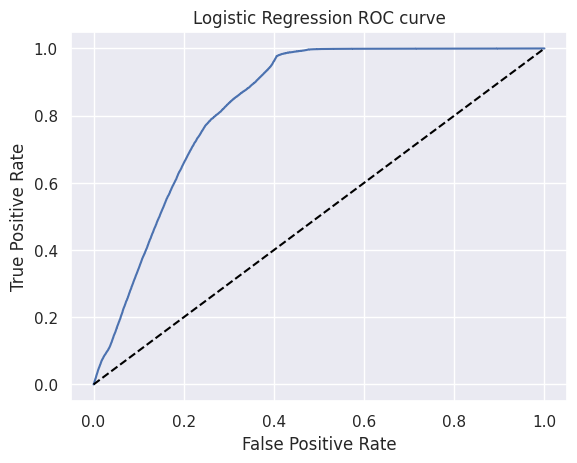

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[59517 40619]
 [ 2403 98101]]


<Axes: >

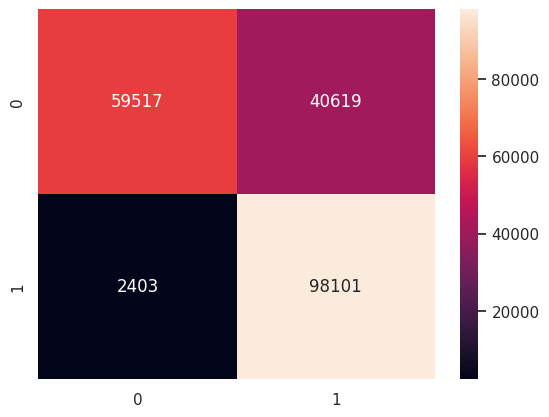

In [ ]:
# Visualizing evaluation Metric Score chart
#Confusion_Matrix
matrix= confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')



*   From the confusion matrix we see that the model is predicting positive responses but also predicting negative response too.



In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61920
           1       0.98      0.71      0.82    138720

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

# **Model Evaluation**

In [ ]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.9960897078723235
precision_score : 0.8929552590266876
f1_score : 0.9417071151747751
accuracy_score : 0.9382276714513557
ROC_AUC Score: 0.9442579927882399


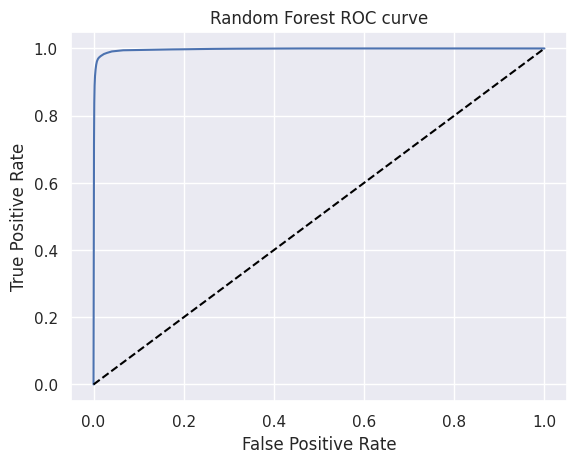

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **Confusion_Matrix**

[[ 88135  12001]
 [   393 100111]]


<Axes: >

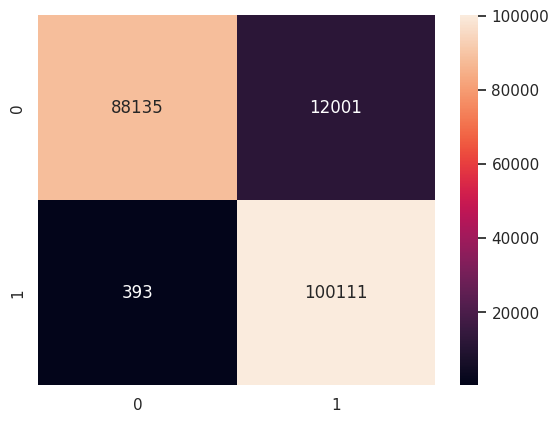

In [ ]:
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     88528
           1       1.00      0.89      0.94    112112

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



The model performs very well, so we can use it to predict unknown data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - X-GBoost

In [ ]:
# ML Model - 3 Implementation

XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

# **Model Evaluation**

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

recall_score :  0.9380422669744488
precision_score : 0.7476545833762896
f1_score : 0.8320969457328079
accuracy_score : 0.8103718102073365
ROC_AUC Score: 0.832059452991017


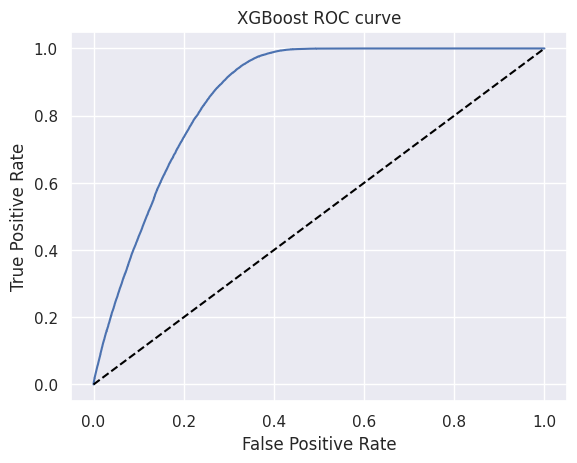

In [ ]:
fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# **Confusion_Matrix**

[[68316 31820]
 [ 6227 94277]]


<Axes: >

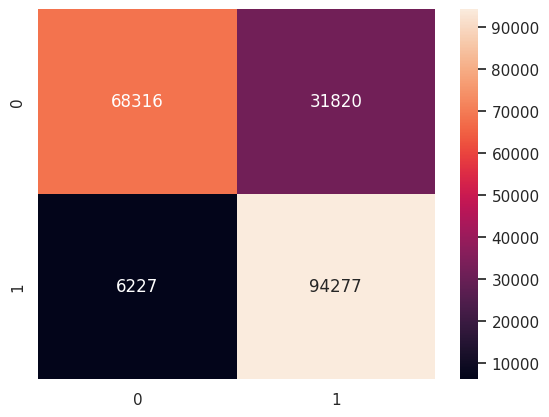

In [ ]:
matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

From the confusion matrix we see that the model is a bit better with predicting positive responses.

In [ ]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78     74543
           1       0.94      0.75      0.83    126097

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.81    200640
weighted avg       0.84      0.81      0.81    200640



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Comparing The Model**

In [ ]:
com= ['Logistic Regression','Randomforest','XGBClassifier']
data={'Accuracy':[A_lgt,A_rf,A_XG],'Recall':[r_lgt,r_rf, r_XG],'Precision':[p_lgt, p_rf, p_XG], 'f1_score':[f1_lgt, f1_rf, f1_XG],'ROC_AUC':[acu_lgt, acu_rf, acu_XG]}
result=pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.785576,0.976091,0.707187,0.820160,0.834190
Randomforest,0.938228,0.996090,0.892955,0.941707,0.944258
XGBClassifier,0.810372,0.938042,0.747655,0.832097,0.832059


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


- We started by loading the dataset and conducted checks for null values and duplicates, finding none.
- Through Exploratory Data Analysis (EDA), we observed that younger customers show more interest in vehicle insurance, particularly those aged below 30.
- Customers with vehicles older than 2 years and those with damaged vehicles were more likely to express interest in vehicle insurance.
- Key variables such as Age, Previously_Insured, and Annual_Premium were found to have significant impact on the target variable.
- Feature selection using the Mutual Information technique identified Previously_Insured as the most influential feature, indicating no correlation between it and the target variable.
- To address the highly imbalanced target variable, we applied Random Over Sample resampling technique.
- Feature scaling techniques were employed to normalize the data for uniform processing by ML algorithms.
- Machine Learning Algorithms were applied to predict customer interest in Vehicle Insurance, with Logistic Regression yielding an accuracy of 78%, and XGBClassifier achieving an accuracy of 81%.
- Notably, the Random Forest model outperformed others with an accuracy of approximately 93% and ROC_AUC score of 94%.
- In conclusion, Random Forest emerges as the superior model compared to others evaluated.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***